In [121]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,   
    "font.family": "DejaVu Sans",
    "font.size": 22,
    'figure.autolayout': True,
    'legend.fontsize': 18})

In [202]:
# km/s/Mpc units
h_0 = 67.36

# 1/years units
h_0 = h_0*(1/3.086e+19)*(60*60*24*365)

# density parameters
om_g0 = 31e-5
#om_g0 = 5.446e-5*1.681
om_m0 = 0.3153 - om_g0
om_l0 = 1 - (om_m0 + om_g0)

# universe age
u_age = 13.797e9

# we consider t_0 = 0 as initial point and solve the equation for t>0 and t<0 separately
# the complete range will be from t = 0 (universe begining or bigbang) to t = 2.5*universe_age
resolution = 200000
t1 = np.linspace(u_age,0,resolution)
t2 = np.linspace(u_age,2.5*u_age,resolution)

# compute the distance between points for each time array (one will be the negative of the other)
step1 = t1[1]-t1[0]
step2 = t2[1]-t2[0]

In [203]:
# definition of euler method
def euler_method(f,t,y0,step):
    y = np.zeros(len(t))
    y[0] = y0
    for i in range(len(t)-1):
        y[i+1] = y[i] + step*f(t[i],y[i])
    return y

In [204]:
# definition of runge-kutta (order 4)
def runge_kutta(f,t,y0,step):
    y = np.zeros(len(t))
    y[0] = y0
    for i in range(len(t)-1):
        k1 = step * f(t[i], y[i])
        k2 = step * f(t[i], y[i] + k1/2)
        k3 = step * f(t[i], y[i] + k2/2)
        k4 = step * f(t[i], y[i] + k3)
        y[i+1] = y[i] + (k1 + 2*k2 + 2*k3 + k4)/6
    return y

In [205]:
# define the function a' = f(t,a) (L-CDM model) which will be solved
def adot_lcdm(t,a):
    return h_0*np.sqrt(om_m0*a**(-1) + om_l0*a**(2) + om_g0*a**(-2))

In [206]:
# boundary condition a(t_0) = 1
a_0 = 1

# Euler method
a_e1 = euler_method(adot_lcdm,t1,a_0,step1)
a_e2 = euler_method(adot_lcdm,t2,a_0,step2)

# Runge Kutta
a_r1 = runge_kutta(adot_lcdm,t1,a_0,step1)
a_r2 = runge_kutta(adot_lcdm,t2,a_0,step2)

In [207]:
# merge np arrays into one for time and scale factor
t = np.append(np.flip(t1),t2[1:])
a_e = np.append(np.flip(a_e1),a_e2[1:])
a_r = np.append(np.flip(a_r1),a_r2[1:])

In [208]:
# function to find nearest point of a function to a given value
def find_nearest(value, domain, image):
    nearest_value = 0
    i = 0
    temp_value = domain[i]
    for i in range(len(image)):
        if(not np.isnan(temp_value)):
            if(np.abs(value - domain[i]) < np.abs(value - temp_value) or temp_value == np.nan):
                temp_value = domain[i]
                nearest_value = image[i]
        else:
            temp_value = domain[i+1]
    return nearest_value

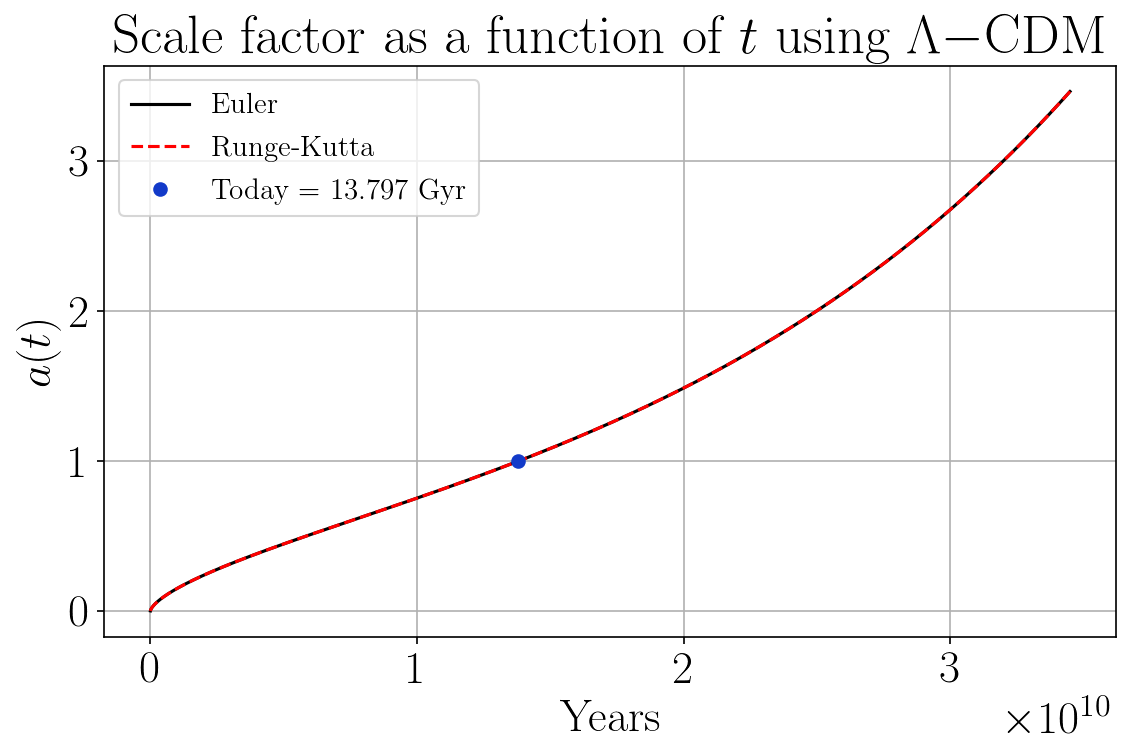

In [209]:
fig,ax = plt.subplots(figsize=(8,5.5),dpi=150)
ax.plot(t,a_e,"k",label=r"Euler")
ax.plot(t,a_r,"--",color="r",label=r"Runge-Kutta")

ax.plot(u_age,1,"o",color="#123ac9",label=r"Today = "+str(u_age/1e9)+r" Gyr")

#ax.set_ylim(-0.002,0.012)
#ax.set_xlim(-0.001e10,0.01e10)

ax.grid()
ax.set_xlabel(r"Years")
ax.set_ylabel(r"$a(t)$")
ax.set_title(r"Scale factor as a function of $t$ using $\Lambda-$CDM")
plt.legend(fontsize=14)
#plt.savefig("1.a(t).png")

In [210]:
# find z(t) using z = 1/a - 1
z = 1/a_r - 1

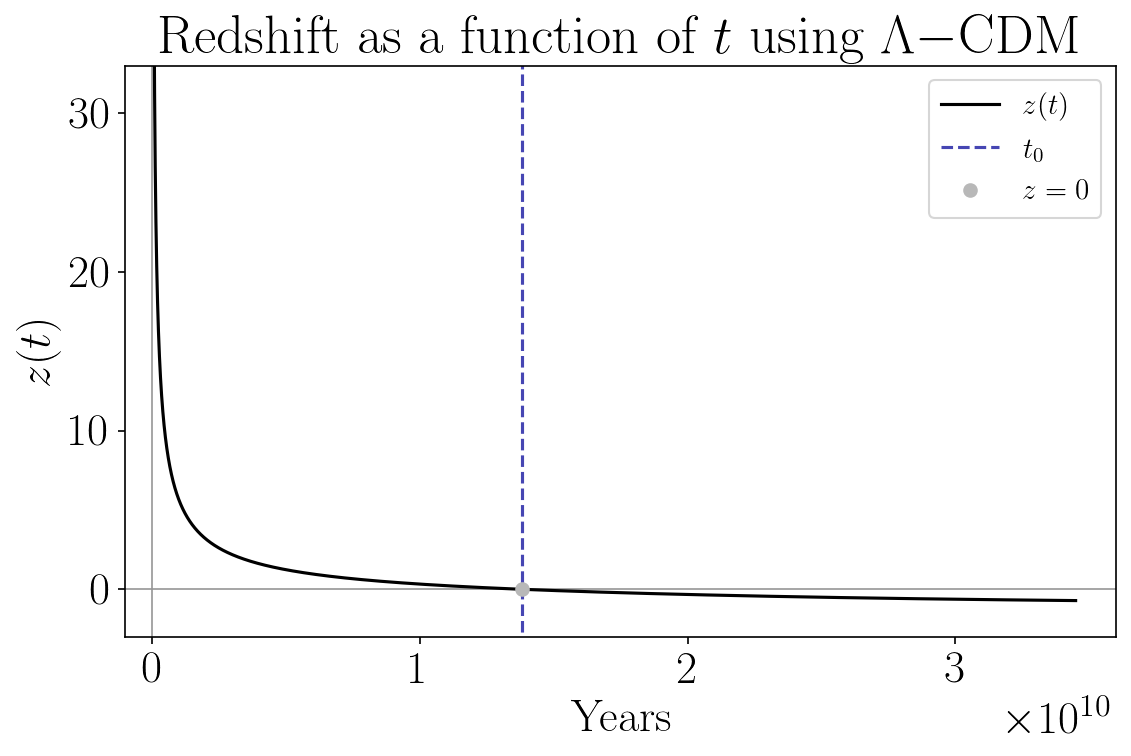

In [211]:
# z(t) plot
fig,ax = plt.subplots(figsize=(8,5.5),dpi=150)

ax.plot([0,0],[-5,35],"k-",color="#969696",linewidth=0.8)
ax.plot([-0.2e10,3.7e10],[0,0],"k-",color="#969696",linewidth=0.8)

ax.plot(t,z,"k",label=r"$z(t)$")

ax.plot([u_age,u_age],[-10,40],"--",color="#4646b3",label=r"$t_0$")
ax.plot(u_age,0,"o",color="#b8b8b8",label=r"$z=0$")

ax.set_ylim(-3,33)
ax.set_xlim(-0.1e10,3.6e10)

#ax.grid()
ax.set_xlabel(r"Years")
ax.set_ylabel(r"$z(t)$")
ax.set_title(r"Redshift as a function of $t$ using $\Lambda-$CDM")
plt.legend(fontsize=14)
#plt.savefig("2.z(t).png")

In [212]:
# compute \dot{a} and H with runge-kutta results
a_dot = adot_lcdm(t,a_r)
H = a_dot / a_r

# change to 1/years units
H_u = H/(1/3.086e+19)/(60*60*24*365)

# find H_0 looking for the nearest point of H(t) to t = u_age
H_0 = find_nearest(u_age,t,H)
H_0u = find_nearest(u_age,t,H_u)


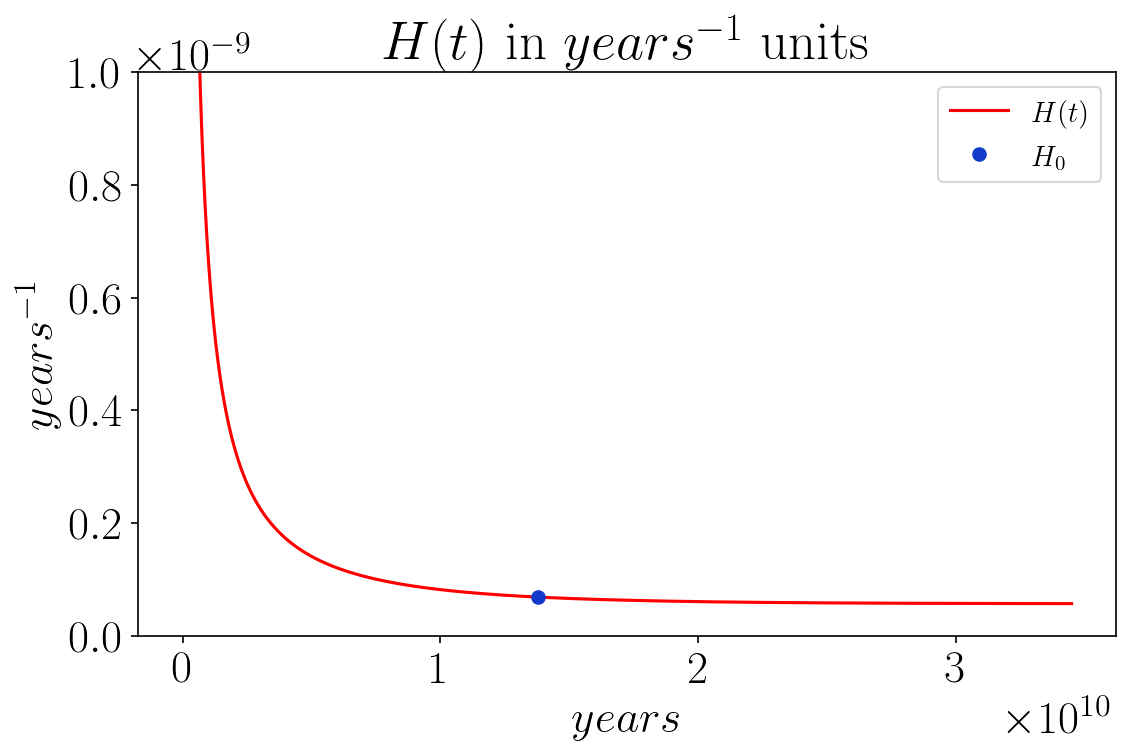

In [213]:
# H plots
fig,ax = plt.subplots(figsize=(8,5.5),dpi=150)

ax.plot(t,H,"r",label=r"$H(t)$")

ax.plot(u_age,H_0,"o",color="#123ac9",label=r"$H_0$")

ax.set_ylim(-1e-80,1e-9)
#ax.set_xlim(-1.000001,-0.99999)

#ax.grid()
ax.set_xlabel(r"$years$")
ax.set_ylabel(r"$years^{-1}$")
ax.set_title(r"$H(t)$ in $years^{-1}$ units")
plt.legend(fontsize=14)
#plt.savefig("3.H(t)y.png")

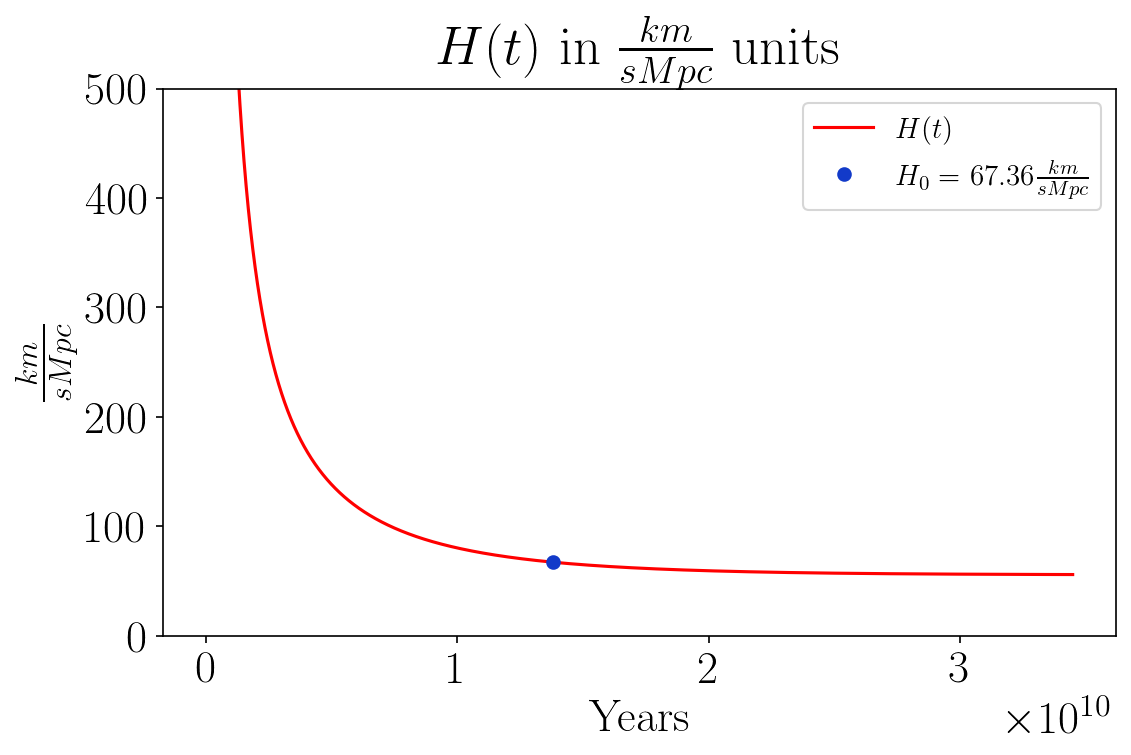

In [214]:
fig,ax = plt.subplots(figsize=(8,5.5),dpi=150)

ax.plot(t,H_u,"r",label=r"$H(t)$")

ax.plot(u_age,H_0u,"o",color="#123ac9",label=r"$H_0=$ "+str(round(H_0u,2))+r"$\frac{km}{s Mpc}$")

ax.set_ylim(0,500)
#ax.set_xlim(-1.000001,-0.99999)

#ax.grid()
ax.set_xlabel(r"Years")
ax.set_ylabel(r"$\frac{km}{s Mpc}$")
ax.set_title(r"$H(t)$ in $\frac{km}{s Mpc}$ units")
plt.legend(fontsize=14)
#plt.savefig("4.H(t)km.png")

In [215]:
# more needed constants
G = 6.674e-11
c = 3e8

# compute the critic density evolution
e_cr = 3*c**2*H**2/(8*np.pi*G)/(60*60*24*365)**2

# find e_cr0 in e_cr array
e_cr0 = find_nearest(u_age,t,e_cr)

# compute density parameters evolution
om_m = om_m0*a_r**(-3)*e_cr0/e_cr
om_g = om_g0*a_r**(-4)*e_cr0/e_cr
om_l = om_l0*e_cr0/e_cr



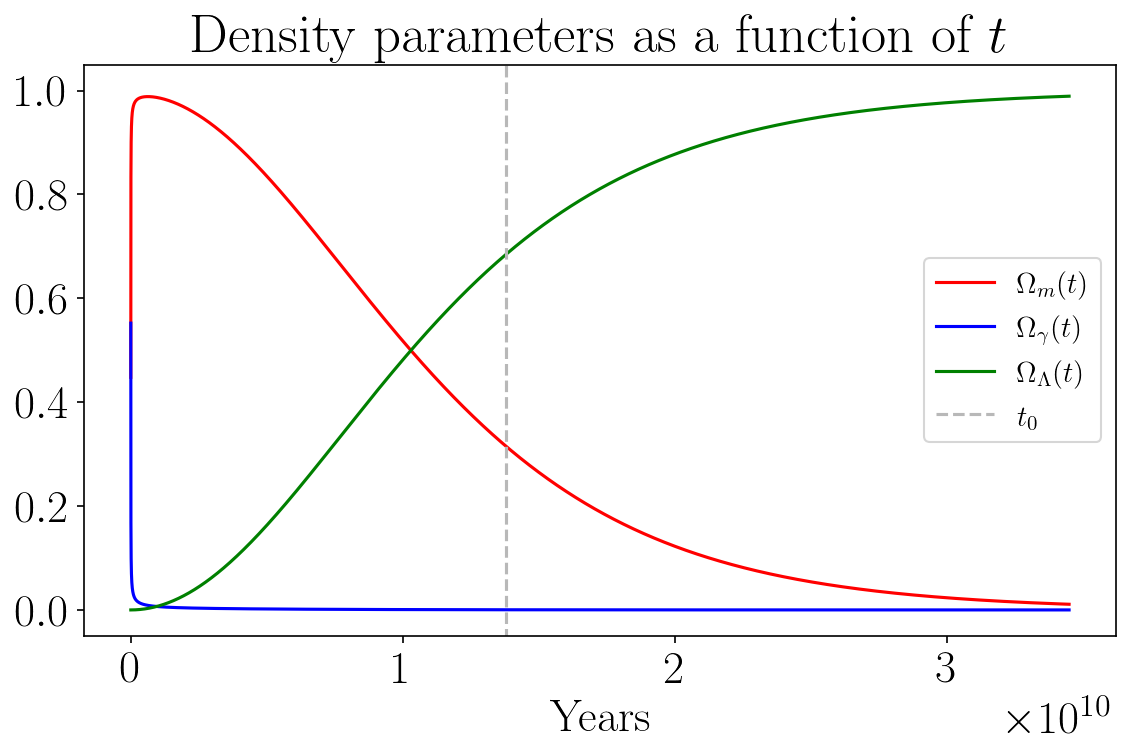

In [216]:
# density parameters as a function of t
fig,ax = plt.subplots(figsize=(8,5.5),dpi=150)

ax.plot(t,om_m,"r",label=r"$\Omega_m(t)$")
ax.plot(t,om_g,"b",label=r"$\Omega_\gamma(t)$")
ax.plot(t,om_l,"g",label=r"$\Omega_\Lambda(t)$")

ax.plot([u_age,u_age],[-1,2],"--",color="#b8b8b8",label=r"$t_0$")

ax.set_ylim(-0.05,1.05)
#ax.set_xlim(-1.000001,-0.99999)

#ax.grid()
ax.set_xlabel(r"Years")
#ax.set_ylabel(r"1/years")
ax.set_title(r"Density parameters as a function of $t$")
plt.legend(fontsize=14)
plt.savefig("5.omega(t).png")

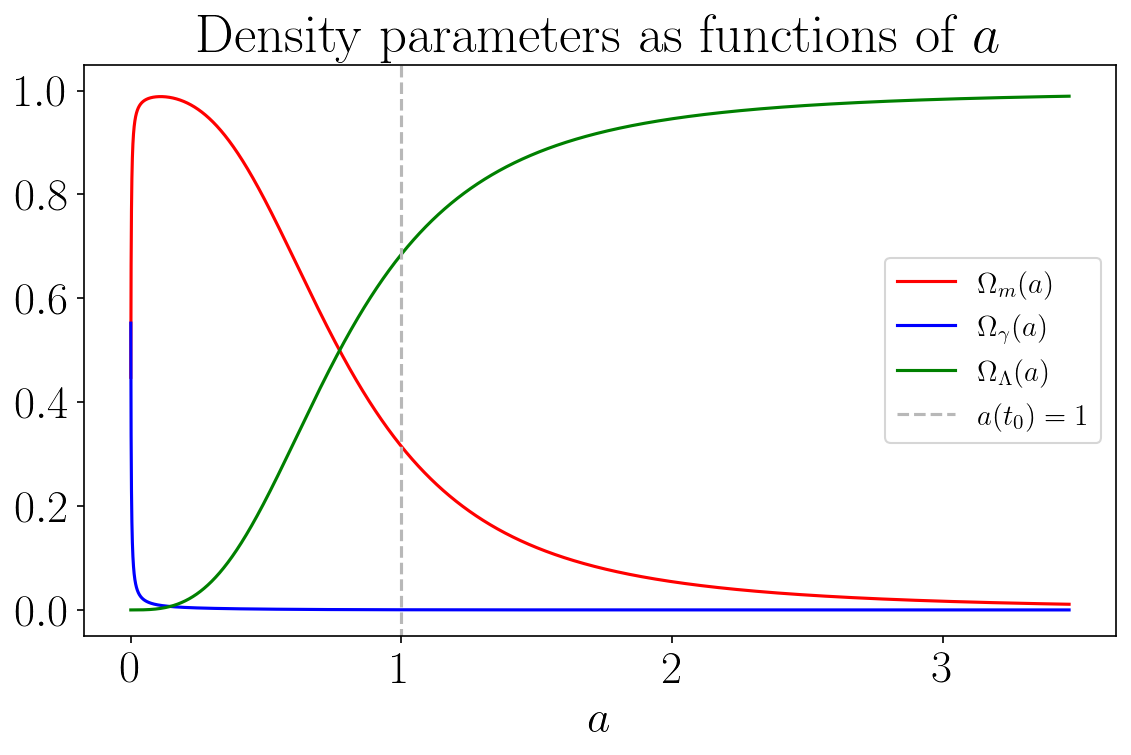

In [217]:
# density parameters as a function of a
fig,ax = plt.subplots(figsize=(8,5.5),dpi=150)

ax.plot(a_r,om_m,"r",label=r"$\Omega_m(a)$")
ax.plot(a_r,om_g,"b",label=r"$\Omega_\gamma(a)$")
ax.plot(a_r,om_l,"g",label=r"$\Omega_\Lambda(a)$")

ax.plot([1,1],[-1,2],"--",color="#b8b8b8",label=r"$a(t_0)=1$")

ax.set_ylim(-0.05,1.05)
#ax.set_xlim(-1.000001,-0.99999)

#ax.grid()
ax.set_xlabel(r"$a$")
#ax.set_ylabel(r"1/years")
ax.set_title(r"Density parameters as functions of $a$")
plt.legend(fontsize=14)
plt.savefig("6.omega(a).png")

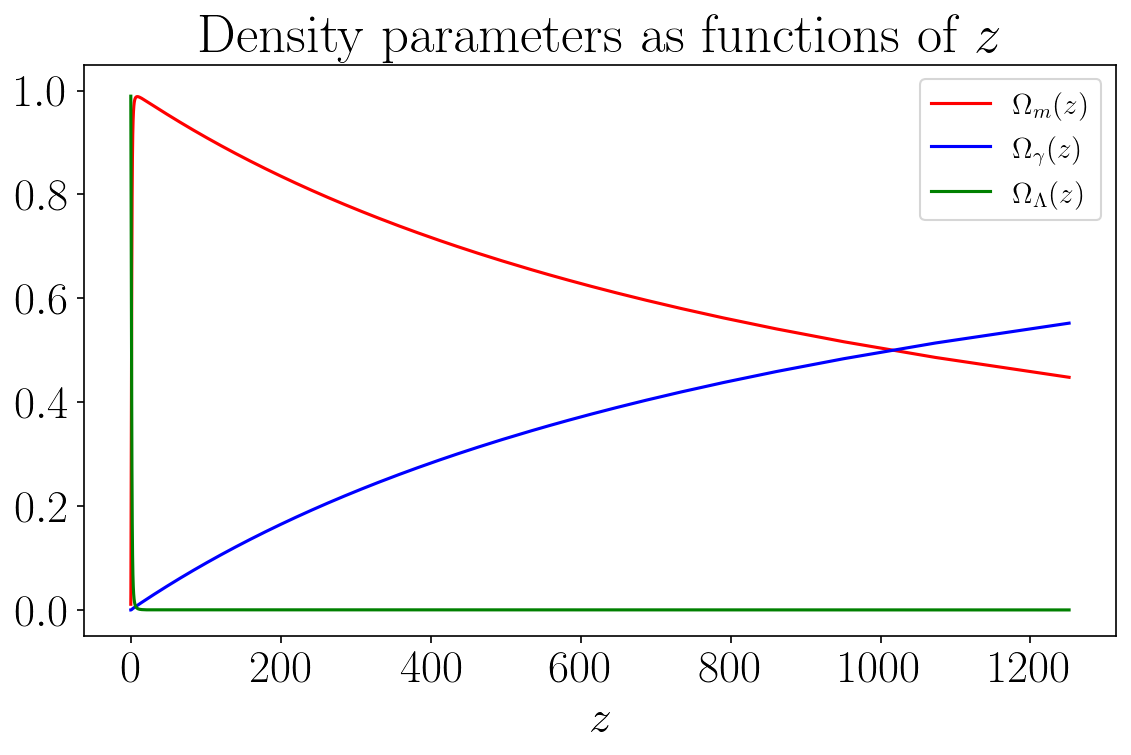

In [218]:
# density parameters as a function of z
fig,ax = plt.subplots(figsize=(8,5.5),dpi=150)

ax.plot(z,om_m,"r",label=r"$\Omega_m(z)$")
ax.plot(z,om_g,"b",label=r"$\Omega_\gamma(z)$")
ax.plot(z,om_l,"g",label=r"$\Omega_\Lambda(z)$")

ax.set_ylim(-0.05,1.05)
#ax.set_xlim(-10,505)

#ax.grid()
ax.set_xlabel(r"$z$")
#ax.set_ylabel(r"1/years")
ax.set_title(r"Density parameters as functions of $z$")
plt.legend(fontsize=14)
plt.savefig("7.omega(z).png")

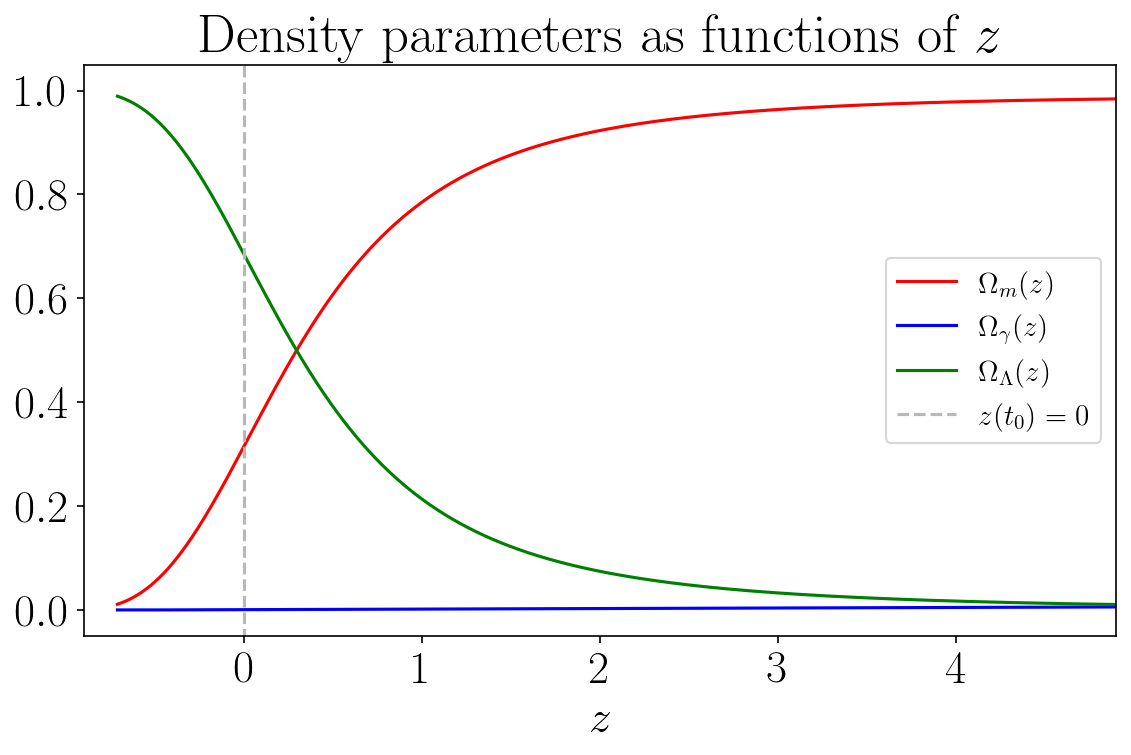

In [219]:
# density parameters as a function of t (zoomed)
fig,ax = plt.subplots(figsize=(8,5.5),dpi=150)

ax.plot(z,om_m,"r",label=r"$\Omega_m(z)$")
ax.plot(z,om_g,"b",label=r"$\Omega_\gamma(z)$")
ax.plot(z,om_l,"g",label=r"$\Omega_\Lambda(z)$")

ax.plot([0,0],[-1,2],"--",color="#b8b8b8",label=r"$z(t_0) = 0$")

ax.set_ylim(-0.05,1.05)
ax.set_xlim(-0.9,4.9)

#ax.grid()
ax.set_xlabel(r"$z$")
#ax.set_ylabel(r"1/years")
ax.set_title(r"Density parameters as functions of $z$")
plt.legend(fontsize=14)
plt.savefig("8.omega(z)zoom.png")

In [220]:
# define numerical integration simpson's method 
def integral_simpson(f,t):
    t_new = []
    integral = []
    integral_sum = 0
    for i in range(len(t)-1):
        t_new_point = (t[i] + t[i+1])/2
        t_new.append(t_new_point)
        integral_sum += (t[i+1] - t[i])*(f[i+1] + f[i])/2
        integral.append(integral_sum)
    return np.array(integral), np.array(t_new)

In [174]:
# we define here the arrays needed in the integration considering as integral limits t_0 and t (independent variable)
t_int = t1
f_int = 1/np.flip(a_r[0:resolution])

# if we want to plot the integral as a function of z, we need a z(t) array
z_int = np.flip(z[0:resolution])

In [175]:
# compute the integrals
d_pt0, t_new = integral_simpson(f_int,t_int)

# we need z(t) array to be the same size as t array, so we can plot d_pt0(z)
z_new = []
for i in range(len(z_int)-1):
    z_new_point = (z_int[i] + z_int[i+1])/2
    z_new.append(z_new_point)
z_new = np.array(z_new)

# change c units to Mpc/year
c = 3e8*(60*60*24*365)*(1/3.086e+22)

# multiply by c (d_p equation) and change sign (because we integrated from t_0 to t, and it should be from t to t_0)
d_pt0 = -c*d_pt0
d_pte = d_pt0/(1+z_new)

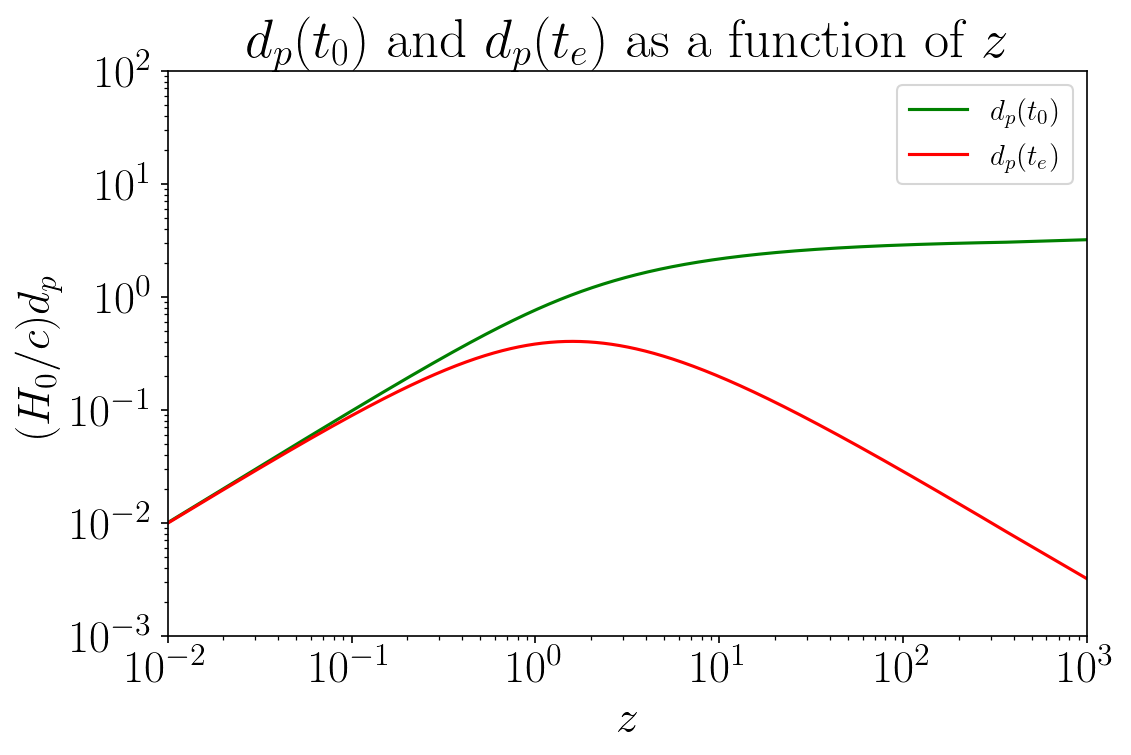

In [176]:
# d_p plots
fig,ax = plt.subplots(figsize=(8,5.5),dpi=150)

ax.plot(z_new,h_0/c*d_pt0,"g",label=r"$d_p(t_0)$")
ax.plot(z_new,h_0/c*d_pte,"r",label=r"$d_p(t_e)$")

ax.set_ylim(10e-4,10e1)
ax.set_xlim(10e-3,10e2)

plt.xscale("log")
plt.yscale("log")

#ax.grid()
ax.set_xlabel(r"$z$")
ax.set_ylabel(r"$(H_0/c) d_p$")
ax.set_title(r"$d_p(t_0)$ and $d_p(t_e)$ as a function of $z$")
plt.legend(fontsize=14)
plt.savefig("9.dplcdm.png")

In [177]:
# compute luminosity and angular diameter distances
d_l = d_pt0*(1 + z_new)
d_ad = d_pt0/(1 + z_new)

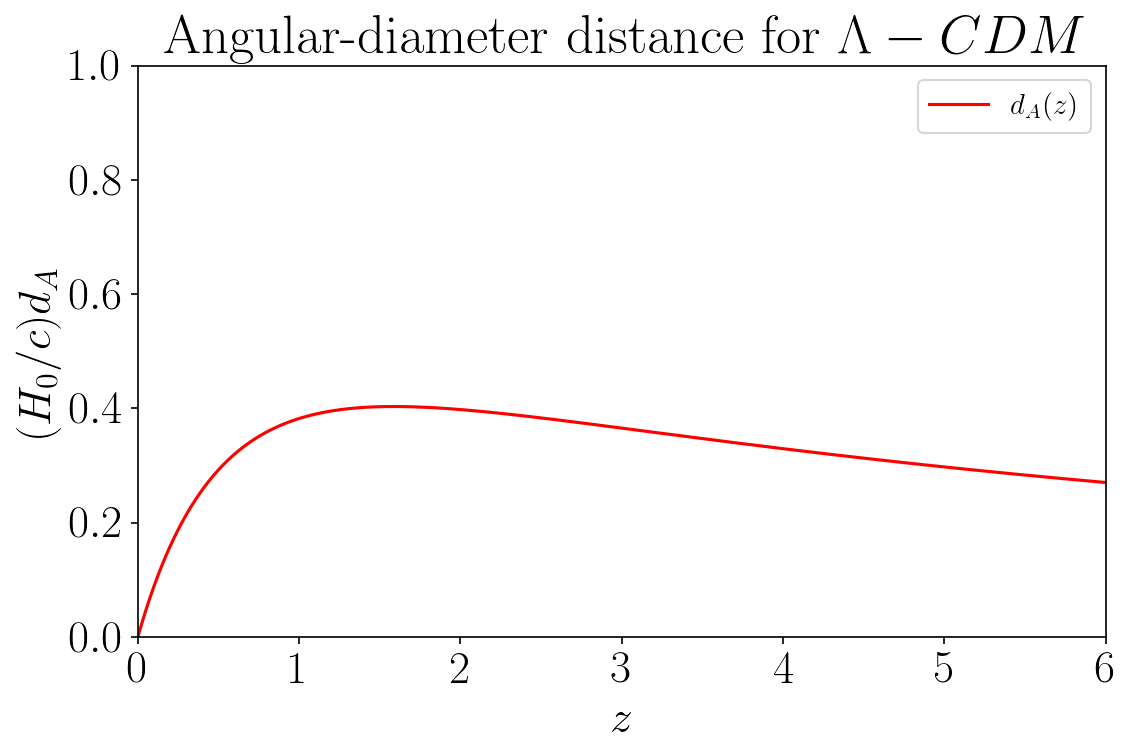

In [178]:
# d_A plot
fig,ax = plt.subplots(figsize=(8,5.5),dpi=150)

ax.plot(z_new,h_0/c*d_ad,"r",label=r"$d_A(z)$")

ax.set_ylim(0,1)
ax.set_xlim(0,6)

#plt.xscale("log")
#plt.yscale("log")

#ax.grid()
ax.set_xlabel(r"$z$")
ax.set_ylabel(r"$(H_0/c) d_A$")
ax.set_title(r"Angular-diameter distance for $\Lambda-CDM$")
plt.legend(fontsize=14)
#plt.savefig("10.dalcdm.png")

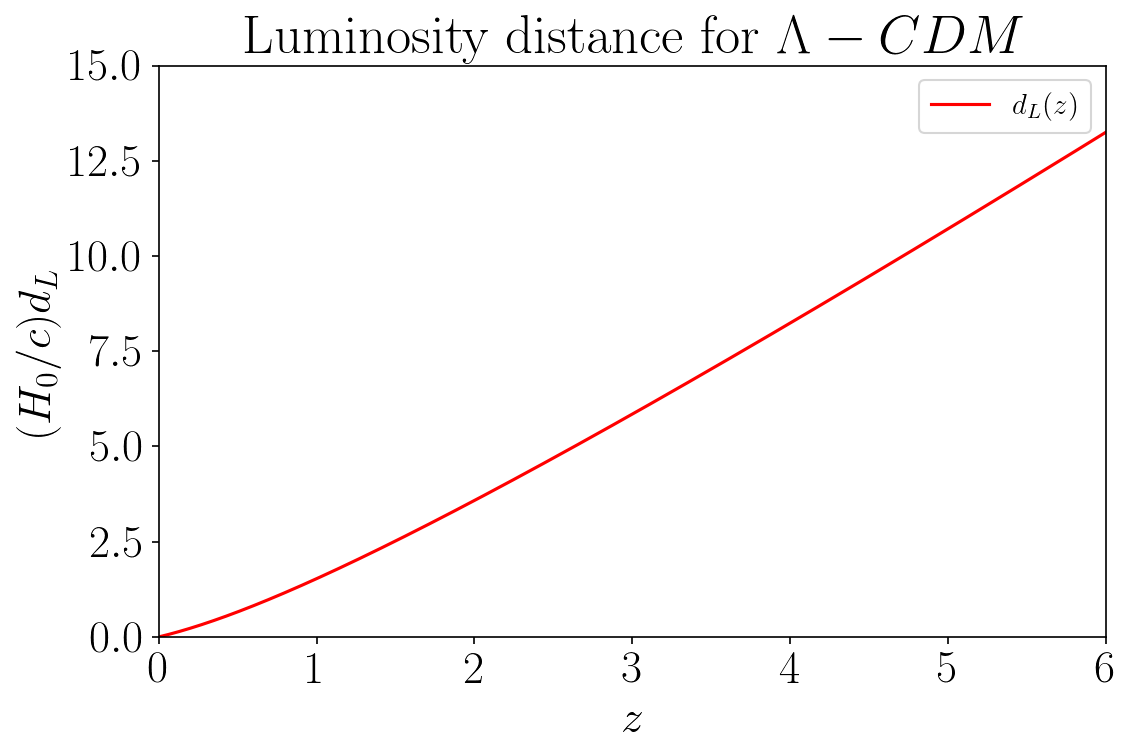

In [179]:
# d_L plot
fig,ax = plt.subplots(figsize=(8,5.5),dpi=150)

ax.plot(z_new,h_0/c*d_l,"r",label=r"$d_L(z)$")

ax.set_ylim(0,15)
ax.set_xlim(0,6)

#plt.xscale("log")
#plt.yscale("log")

#ax.grid()
ax.set_xlabel(r"$z$")
ax.set_ylabel(r"$(H_0/c) d_L$")
ax.set_title(r"Luminosity distance for $\Lambda-CDM$")
plt.legend(fontsize=14)
#plt.savefig("11.dllcdm.png")

In [180]:
# compute the distance modulus
mu = 5*np.log10(d_l) + 25

In [181]:
# import pandas to read experimental data
import pandas as pd
df_mu = pd.read_csv("mu.csv")
z_exp = np.array(df_mu["z"])
mu_exp = np.array(df_mu["mu"])
error_exp = np.array(df_mu["error"])

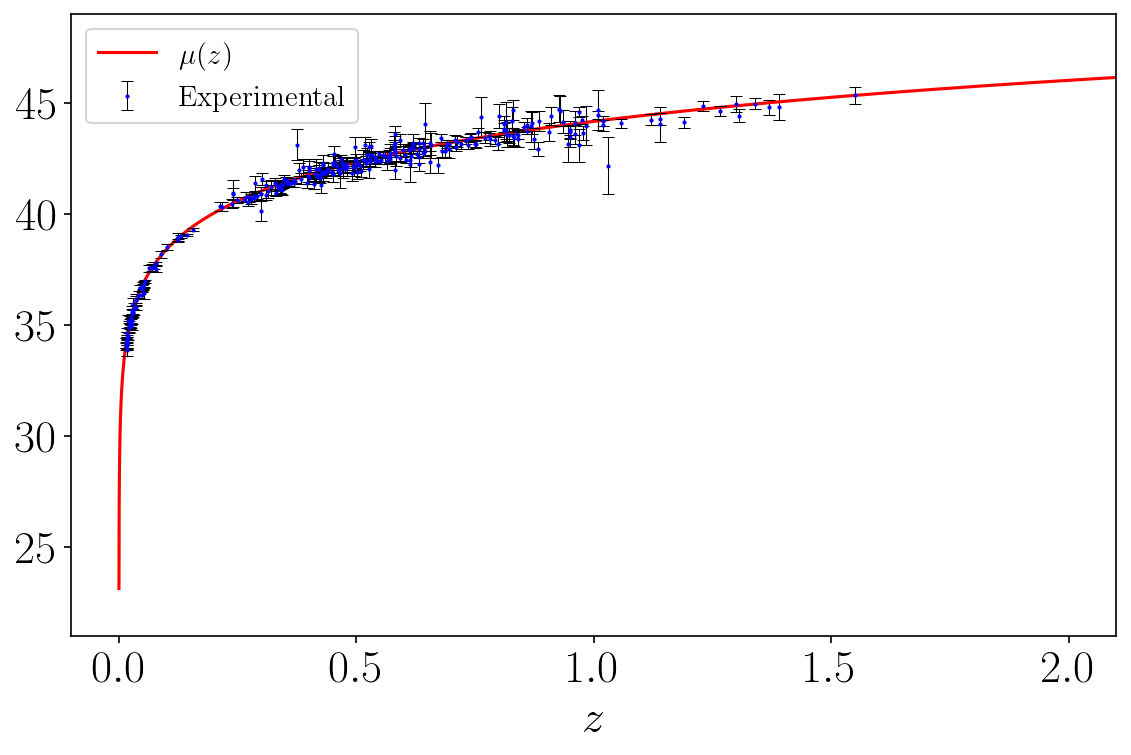

In [182]:
fig,ax = plt.subplots(figsize=(8,5.5),dpi=150)

ax.plot(z_new,mu,"r",label=r"$\mu(z)$")
ax.errorbar(z_exp,mu_exp,yerr=error_exp,fmt='.',elinewidth=0.5,capthick=0.5,capsize=3,ecolor="k",color="b",ms=2,label=r"Experimental")

ax.set_ylim(21,49)
ax.set_xlim(-0.1,2.1)

#plt.xscale("log")
#plt.yscale("log")

#ax.grid()
ax.set_xlabel(r"$z$")
#ax.set_ylabel(r"1/years")
#ax.set_title(r"Density parameters as functions of $z$")
plt.legend(fontsize=14)
#plt.savefig("12.mulcdm.png")